In [1]:
import yahoo_fin.options as ops
import yahoo_fin.stock_info as si
import opstrat as op
import datetime
import pandas as pd

In [2]:
today = datetime.date.today()
formatted_date = today.strftime('%m/%d/%Y')
formatted_date

'04/28/2023'

In [3]:
stock = input("Enter Stock>>>")

Enter Stock>>>SOFI


In [4]:
expiration_dates = ops.get_expiration_dates(stock)
#expiration_dates

In [5]:
Calls = ops.get_calls(stock,expiration_dates[-3])
Calls.set_index("Contract Name",inplace = True)
#Calls

In [6]:
Puts = ops.get_puts(stock,expiration_dates[-3])
Puts.set_index("Contract Name",inplace = True)
#Puts

### Single Plot

In [7]:
Call = Calls.iloc[1]
Call

Last Trade Date       2023-04-27 10:03AM EDT
Strike                                   2.5
Last Price                              3.75
Bid                                     3.85
Ask                                     3.95
Change                                   0.0
% Change                                   -
Volume                                    25
Open Interest                            624
Implied Volatility                    97.07%
Name: SOFI231215C00002500, dtype: object

In [8]:
daily = si.get_data(stock, start_date="01/01/2023", end_date=today, index_as_date = True, interval="1d")
today = daily.iloc[-1]
today

open            5.77
high            6.19
low             5.75
close           6.06
adjclose        6.06
volume      43199900
ticker          SOFI
Name: 2023-04-27 00:00:00, dtype: object

In [9]:
Spot = today[3]
Strike = Call[1]

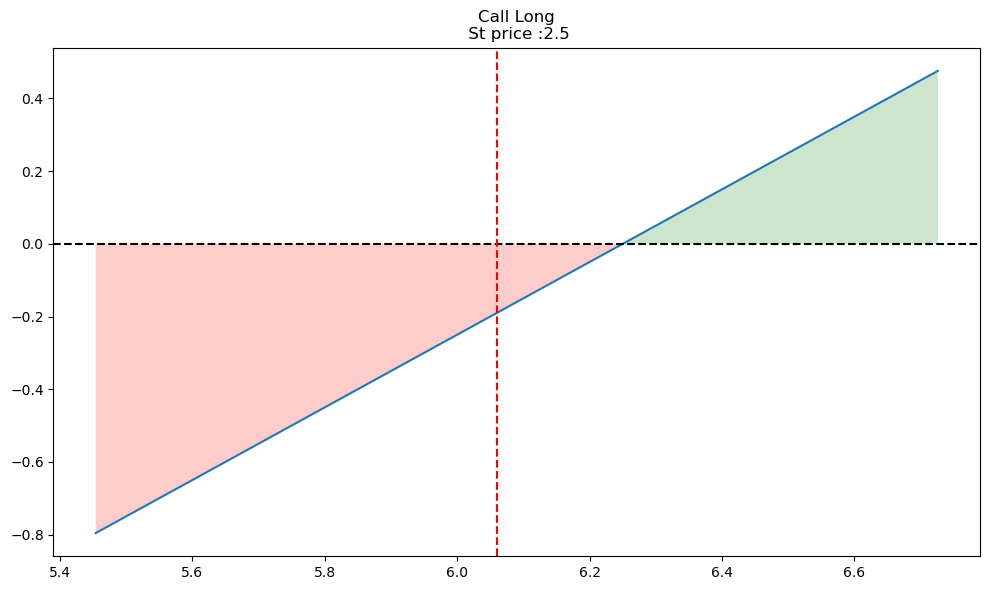

In [10]:
op.single_plotter(spot=Spot, strike=Strike, op_type='c', tr_type='b', op_pr=Call[2])

In [38]:
ploss = {'Equity Market Price at Expiry': [Strike-1,Strike,Strike+2,Strike+4,
                                           Strike+6]}
noc = int(Call[-3]) #number of contracts bought/sold
sperc = 100*noc #100 shares per contract
df = pd.DataFrame(ploss, columns = ['Equity Market Price at Expiry','Profit/Loss'])
payoffs = []
for i in df['Equity Market Price at Expiry']:

# Calculate Option Payoffs
        payoff = max(((i - Strike) * sperc) - (Call[2]*sperc),-Call[2]*sperc)
        payoffs.append(payoff)

# Create DataFrame
ploss['Profit/Loss']=payoffs
final=pd.DataFrame(ploss,columns=['Equity Market Price at Expiry','Profit/Loss']).set_index('Equity Market Price at Expiry')

final

,Profit/Loss
Equity Market Price at Expiry,
1.5,-9375.0
2.5,-9375.0
4.5,-4375.0
6.5,625.0
8.5,5625.0


### Multi Plot (Portfolio)

In [39]:
Put = Puts.iloc[1]
Put

Last Trade Date       2023-04-28 2:04PM EDT
Strike                                  2.5
Last Price                             0.11
Bid                                    0.09
Ask                                    0.13
Change                                 0.02
% Change                            +22.22%
Volume                                  392
Open Interest                          8930
Implied Volatility                   85.94%
Name: SOFI231215P00002500, dtype: object

In [40]:
Strike1 = Put[1]
Strike2 = Call[1]

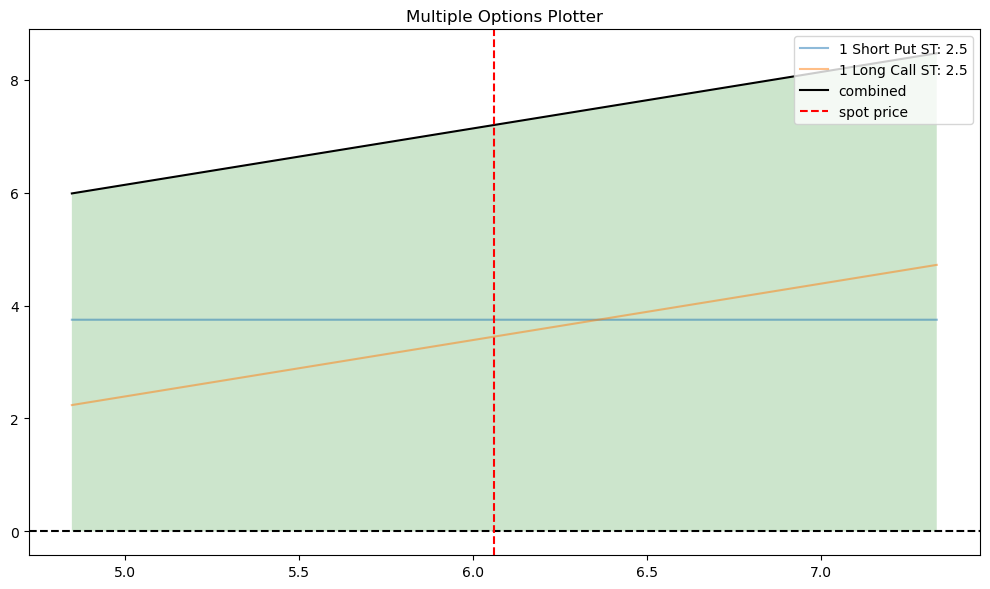

In [41]:
op1={'op_type': 'p', 'strike': Strike1, 'tr_type': 's', 'op_pr': Call[2]}
op2={'op_type': 'c', 'strike': Strike2, 'tr_type': 'b', 'op_pr': Put[2]}

op_list=[op1, op2]
op.multi_plotter(spot=Spot, op_list=op_list)

In [46]:
ploss = {'Equity Market Price at Expiry': [Strike-5,Strike,Strike+5,Strike+10,
                                           Strike+15]}
cnoc = int(Call[-3]) #number of contracts bought/sold
pnoc = int(Put[-3]) #number of contracts bought/sold
sperc = 100*cnoc #100 shares per contract
df = pd.DataFrame(ploss, columns = ['Equity Market Price at Expiry','Profit/Loss'])
payoffs = []
for i in df['Equity Market Price at Expiry']:

# Calculate Option Payoffs
        payoff = ((i - Strike2) * sperc) - (Call[2]*sperc) + ((i - Strike1) * sperc) - (Put[2]*sperc)
        payoffs.append(payoff)

# Create DataFrame
ploss['Profit/Loss']=payoffs
final=pd.DataFrame(ploss,columns=['Equity Market Price at Expiry','Profit/Loss']).set_index('Equity Market Price at Expiry')

final

,Profit/Loss
Equity Market Price at Expiry,
-2.5,-34650.0
2.5,-9650.0
7.5,15350.0
12.5,40350.0
17.5,65350.0


### Implied volatility

In [43]:
implied_volatility = Call[-1]
implied_volatility

'97.07%'